# COGS 108 - Understanding Housing Value v.s. Crime Rate

# Permissions

Place an `X` in the appropriate bracket below to specify if you would like your group's project to be made available to the public. (Note that student names will be included (but PIDs will be scraped from any groups who include their PIDs).

* [`X`] YES - make available
* [  ] NO - keep private

# Names

- Natalie Huynh
- Jasmine Tran
- Jan Daguio
- Edward Jin
- James Olichney

# Abstract

In this project, we decided to explore the relationship between housing value and crime rate across major cities in the United States. We embarked on this project because we wanted to share some insights into major cities for those looking into a place to settle (such as when having to choose between different jobs, location can play an important role). The specific focus on crime rate is largely because this is the major factor that most people think of when deciding how safe a place is. 

To conduct our analysis, we focused on two specific data sets: the Zillow Home Value Index (ZHVI) for Single-Family Homes and FBI Crime Rate data collected by the FBI. Since the FBI crime data came from the year 2022, we decided to also focus on ZHVI values over 2022. After data cleaning, the two datasets contained each City and State so we could join the two datasets together into one. From there, we took a look at the overall trend between ZHVI and Crime Rate. Then, we grouped each city by the region it is in (West, Midwest, South, and North) and took a look at trends within each region. 

When we took a look at trends within each region using Spearman’s correlation, we got northeast being around -0.49, midwest being around -0.65, south being around -0.56, and the west being around -0.42. While all show a general negative trend between ZHVI and Crime Rate, the values are not strong enough (absolute value at least 0.7) to demonstrate that cities with higher housing values are associated with lower crime rates.

# Research Question


Is there a connection between violent crime rate (reported to FBI) and single family housing values (based on the Zillow Home Value Index) in American cities? Does the relationship between violent crime and single family housing values change between different regions of the United States? 

## Background and Prior Work

It’s not surprising that big cities are often people’s first choices to live in. After all, it’s hard to beat the job opportunities, various amenities (restaurants, theaters, parks, etc.), access to public transit, and lively atmosphere that comes with it <a name="cite_ref-1"></a>[<sup>1</sup>](#cite_note-1). When choosing where to live, prospective residents have interest in living in a city environment, but would rather avoid living in a city with high crime rates. “Safety” is important to prospective residents and is considered to be one of the three main factors that make a city “livable” according to journals such as World Economic Forum <a name="cite_ref-2"></a>[<sup>2</sup>](#cite_note-2). 

But what exactly does "safety" mean? There can be various factors that contribute to what it means to be safe. For example, safety can also come from how prepared and well-constructed the city is to face natural disasters <a name="cite_ref-5"></a>[<sup>5</sup>](#cite_note-5). Additionally, safety can also come from the level of pollution in the city and generally how sanitary it is <a name="cite_ref-5"></a>[<sup>5</sup>](#cite_note-5). However, generally speaking, when people think of the level of safety, crime rate is the first to come to mind.

We also want to note that our project will be specifically measuring the violent crime rate, which excludes crimes such as theft or property crimes. Violent crimes include: robbery, rape, sexual assault, assualt and murder <a name="cite_ref-6"></a>[<sup>6</sup>](#cite_note-5). While theft and property crimes are awful, we believe that violent crime rate is the best measure for this project because prospective house buyers, often living with family, may be most concerned about their physical wellbeing and the health of their family. Our project focuses on prospective home buyers who may live with some part of their family. As such, our dataset on housing is focused on the prices of single family homes.

Some prior works include:
- A study done by USAFacts that explores the prevalence of different types of crime across different cities in the USA <a name="cite_ref-3"></a>[<sup>3</sup>](#cite_note-3). 
    - They wanted to answer the question: "Which cities have the highest or lowest crime rates?" in the year 2021.
    - To answer this question, they looked at crime rate per city data released by the FBI. Additionally, two categories of crimes were looked at: violent crimes and property crimes. Violent crimes involve homicide, rape, robbery, and aggravated assault. Property crimes actions like theft. 
    - An interesting trend noticed is that both property crime and violent crime slightly decreased in 2021. When looking at violent crime, Memphis, Tennessee, experienced the highest violent crime rate. When looking at property crime, Tacoma, Washington experienced the highest property crime rate.
    - This study relates to what we are doing because there is a focus on identifying which cities have the highest crime rates. However, we plan to connect these crime rates with other trends like trends in housing evaluation prices. 
- A ranking reported by Yahoo Finance recommends 30 cities that are both affordable and relatively safe <a name="cite_ref-4"></a>[<sup>4</sup>](#cite_note-4). 
    - In this particular work, the authors wanted to answer the question of what are some of America’s safest & affordable places to live.
    - The study references the work of GOBankingRates, which conducted a study to determine the safest and most economical cities to reside in America. They achieved this by evaluating the crime rates and the expenses associated with housing, rent, groceries, utilities, and transportation in the 200 largest cities across the United States.
    - The report mentions that Brownsville, Texas is the best place in the U.S. in terms of safety and affordability (based on how they defined it in the study as mentioned in the previous bullet point). 
    - This work related to our work because we also hope to establish a ranking for people so they can find the safest city that is also within their price range. However, our rankings will be done within stratas: for example, among cities within a certain price range, which are the safest? Furthermore, instead of just producing a list, we also aim to provide geospatial visualizations.   

# Hypothesis


We hypothesize that cities with higher housing values (based on the Zillow Home Value Index) tend to have lower crime rates, making them safer, while cities with lower housing values may exhibit higher crime rates, indicating they are less safe. This is because we would expect more expensive cities to have better resources in place to prevent crime from happening.

# Data

## ZHVI (Zillow Home Value Index) Single-Family Homes Time Series By City Dataset

- Dataset Name: ZHVI Single-Family Homes Time Series By City
- Link to the dataset: https://www.zillow.com/research/data/ 
- Number of observations: 21,548 observations (before cleaning)
- Number of variables: 298 variables/columns (before cleaning)

Description: This data set comes from from Zillow and presents the ZHVI of single-family homes over time for various cities. Each observation (or city) has columns for each month for each year from 2000 to January 2024. In each of these columns is the ZHVI given to that city for Single-Family homes for that month and year. Other variables include Region ID, SizeRank, RegionName, StateName, State, City, Metro, and CountyName. For our purposes, we will be using “City” to identify locations and the ZHVI for months starting from the year 2022 once this dataset is cleaned. We intend to average the ZHVI for 2022 across the 12 months. 

In [3]:
# import pandas and numpy library
import pandas as pd
import numpy as np

# import seaborn and apply plotting styles
import seaborn as sns
sns.set(font_scale=2, style="white")

# import matplotlib
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.style as style

# set plotting size parameter
plt.rcParams['figure.figsize'] = (17, 7)

In [6]:
housing = pd.read_csv('City_zhvi_uc_sfr_tier_0.33_0.67_sm_sa_month.csv')


columns_2022 = ['2022-01-31', '2022-02-28', '2022-03-31', '2022-04-30', '2022-05-31', '2022-06-30', '2022-07-31', '2022-08-31', '2022-09-30', '2022-10-31', '2022-11-30', '2022-12-31']
housing['average_2022'] = housing[columns_2022].mean(axis=1)


housing = housing[['RegionName', 'State', 'average_2022']]

# renaming RegionName to City since all region types are cities

housing = housing.rename(columns = {'RegionName': 'City'})

housing.head()

,City,State,average_2022
0,New York,NY,770908.869625
1,Los Angeles,CA,970853.303948
2,Houston,TX,261546.063971
3,Chicago,IL,283114.011933
4,San Antonio,TX,257943.551527


In [3]:
#check to see how many states have home value index data
len(housing['State'].unique())

51

All 50 states are included in the home value index data (the 51st value is Washington DC. which will be removed below since it is not a state).

## FBI Violent Crime Rate Dataset

- Dataset Name: FBI Crime Rate Dataset
- Link to the dataset: https://usafacts.org/articles/how-does-crime-compare-by-city-in-2021/
- Number of observations: 188 (before cleaning)
- Number of variables: 4 (before cleaning)

Description: This origins of the data set comes from the violent crime collected in the first three quarters of 2022 by the FBI for 188 US cities with populations over 100,000. USAFacts was able to provide this data through a direct download from their website. The important columns in this dataset are ADDRESS / PLACE and Violent Crime Rate. We will drop the LAT and LON columns given since that is not necessary for our purposes. The ADDRESS / PLACE variable is of type string and Violent Crime Rate is of type float. For Violent Crime Rate, it is the number of recorded violent crimes per 100,000 people. Finally, there are 188 observations, or the 188 US cities with populations over 100,000 that this dataset focuses on. This is 188 out of a total of 333 cities with a population over 100,000 in the USA<a name="cite_ref-7"></a>[<sup>7</sup>](#cite_note-7). Unfortunately, our data might not get a complete picture of US cities. We discuss concerns with this incomplete data further in our Ethics and Privacy Section. 

In [10]:
!pip install us
import us

crime = pd.read_csv('crime.csv')

crime.dtypes

# eliminating irrelevant columns
columns_to_drop = ['LAT', 'LON'] 
crime = crime.drop(columns=columns_to_drop) 

# reorganizing dataset to match columns and state abbreviations of second dataset
split_val = crime['ADDRESS / PLACE'].str.split(',', expand=True)
split_val.columns = ['City', 'State']
crime = pd.concat([crime, split_val], axis=1)
crime = crime.drop(columns=['ADDRESS / PLACE'])
crime = crime[['City', 'State', 'Violent Crime Rate']]

crime['State'] = crime['State'].apply(lambda x: us.states.lookup(x).abbr if us.states.lookup(x) else x) #chatgpt generated line to apply us library

crime.head()

,City,State,Violent Crime Rate
0,Memphis,TN,1720.086720
1,Little Rock,AR,1439.019469
2,Detroit,MI,1410.700185
3,Tacoma,WA,1191.981461
4,Pueblo,CO,1184.606293


In [5]:
#check to see how many states have crime report data
len(crime['State'].unique())

41

Only 40 states are included in the crime report data (the 41st value is Washington DC. which will be removed below since it is not a state). This will be important when we merge datasets as 10 states will be excluded. 

# Results

## Exploratory Data Analysis

### Section 1: Distributions of Crime and ZHVI

In [6]:
# null values in crime
crime.isnull().sum()

City                  0
State                 0
Violent Crime Rate    0
dtype: int64

We can see that in our re-formatted crime data there are no null values present. 

In [7]:
# null values in ZHVI
housing.isnull().sum()

City              0
State             0
average_2022    912
dtype: int64

We can see that in the average_2022 column for the reformatted ZHVI (Zillow Home Value Index) Single-Family Homes Time Series By City Dataset, there are 912 null values.

In [8]:
# print rows where column 'average_2022' is null
null_rows = housing[housing['average_2022'].isnull()]
print("Rows with null values in column 'B':")
print(null_rows)

Rows with null values in column 'B':
                   City State  average_2022
45            Rochester    NY           NaN
690          Binghamton    NY           NaN
903              Monroe    NY           NaN
971           Hempstead    NY           NaN
1075           Newburgh    NY           NaN
...                 ...   ...           ...
21506          McGuffey    OH           NaN
21508  Stuyvesant Falls    NY           NaN
21511      Derby Center    VT           NaN
21524  Henderson Harbor    NY           NaN
21534        Glenbeulah    WI           NaN

[912 rows x 3 columns]


After taking a look at which cities were NULL, and taking a look at the original data, it appears that these cities had no ZHVI data for the year 2022. This means that these cities were only being included in the ZHVI calculations some time after the year 2022. our initial speculation as to why these cities appear to have no ZHVI calculations is likely that Zillow had little to no access to housing data for that particular city in the year 2022. The specific reasons for why Zillow was unable to have access to said data, we are unsure.

In [9]:
# merge the two data sets on City, State
crime_and_housing_val = pd.merge(crime, housing, on=['City', 'State'])
crime_and_housing_val.head()

,City,State,Violent Crime Rate,average_2022
0,Memphis,TN,1720.086720,145509.404617
1,Little Rock,AR,1439.019469,198783.774528
2,Detroit,MI,1410.700185,71702.600692
3,Tacoma,WA,1191.981461,466892.232451
4,Pueblo,CO,1184.606293,290099.792223


In [10]:
# check to see how many states remain in the merged dataset
crime_and_housing_val['State'].unique()

array(['TN', 'AR', 'MI', 'WA', 'CO', 'MO', 'OH', 'IL', 'NM', 'CA', 'MN',
       'TX', 'WI', 'LA', 'MD', 'OK', 'MT', 'SC', 'UT', 'MA', 'NC', 'AL',
       'NY', 'GA', 'VA', 'IA', 'IN', 'ND', 'AZ', 'OR', 'NJ', 'SD', 'FL',
       'NV', 'CT', 'NE', 'RI', 'KY', 'KS', 'ID'], dtype=object)

Not all states present in one dataset are in the other. In the above cell, we see which states are present after the merge. Although we are focusing on cities, this will be helpful in the next section when we take a look at correlations within each region in the U.S.

We can plot each variable in a histogram in order to gain insight into their distribution, uncover potential patterns, and identify any outliers. 

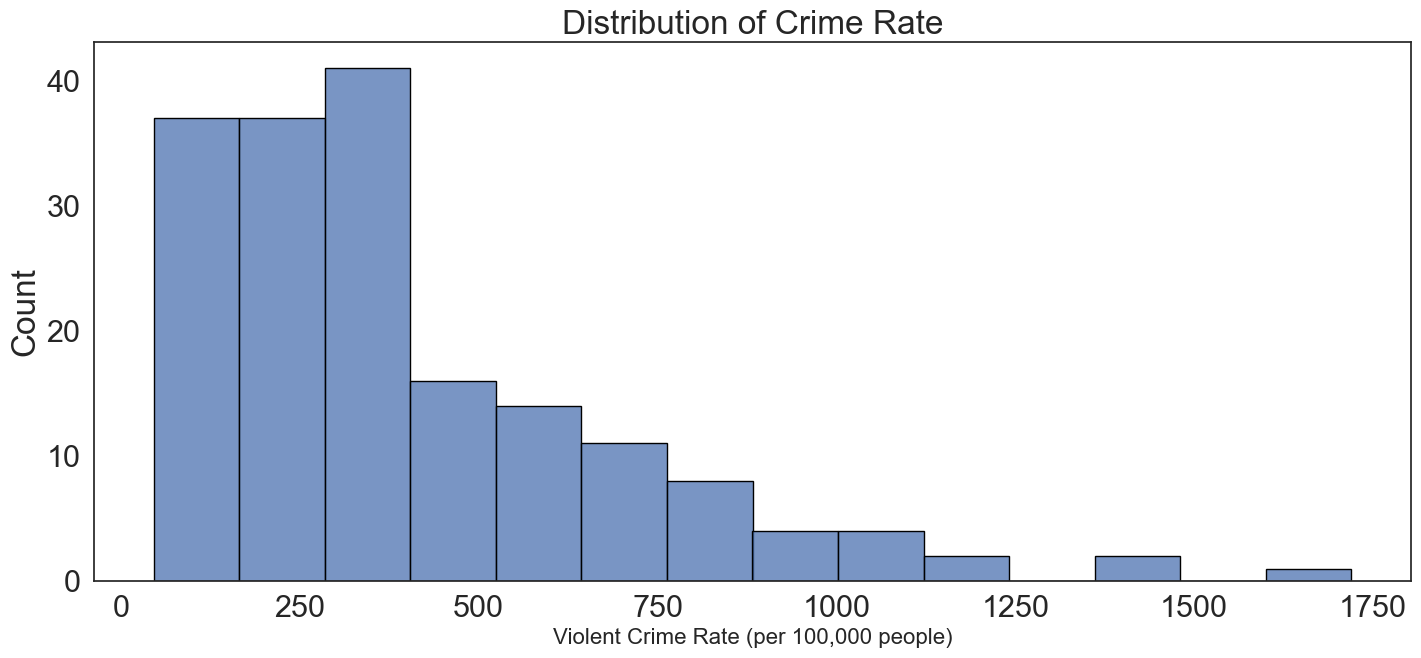

In [11]:
# histogram Violent Crime Rate
sns.histplot(data = crime_and_housing_val, x = 'Violent Crime Rate', edgecolor = 'black').set(title = 'Distribution of Crime Rate')
plt.xlabel('Violent Crime Rate (per 100,000 people)', fontsize=16);

We can see a clear right-skew in the violent crime rate among the cities present. It looks like most of the cities have a violent crime rate less than 1000 (per 100,000 people). There doesn't appear to be any notable outliers but there are a couple of cities that have a violent crime rate above 1250 so let's see what they are. 

In [12]:
high_crime_cities = crime_and_housing_val[crime_and_housing_val['Violent Crime Rate'] > 1250]
print(high_crime_cities)

          City State  Violent Crime Rate   average_2022
0      Memphis    TN         1720.086720  145509.404617
1  Little Rock    AR         1439.019469  198783.774528
2      Detroit    MI         1410.700185   71702.600692


The above cities do not seem to have any relation.

Next, we can view the distribution of average ZHVI and compare it with the above histogram.

Text(0.5, 0, 'Average ZHVI')

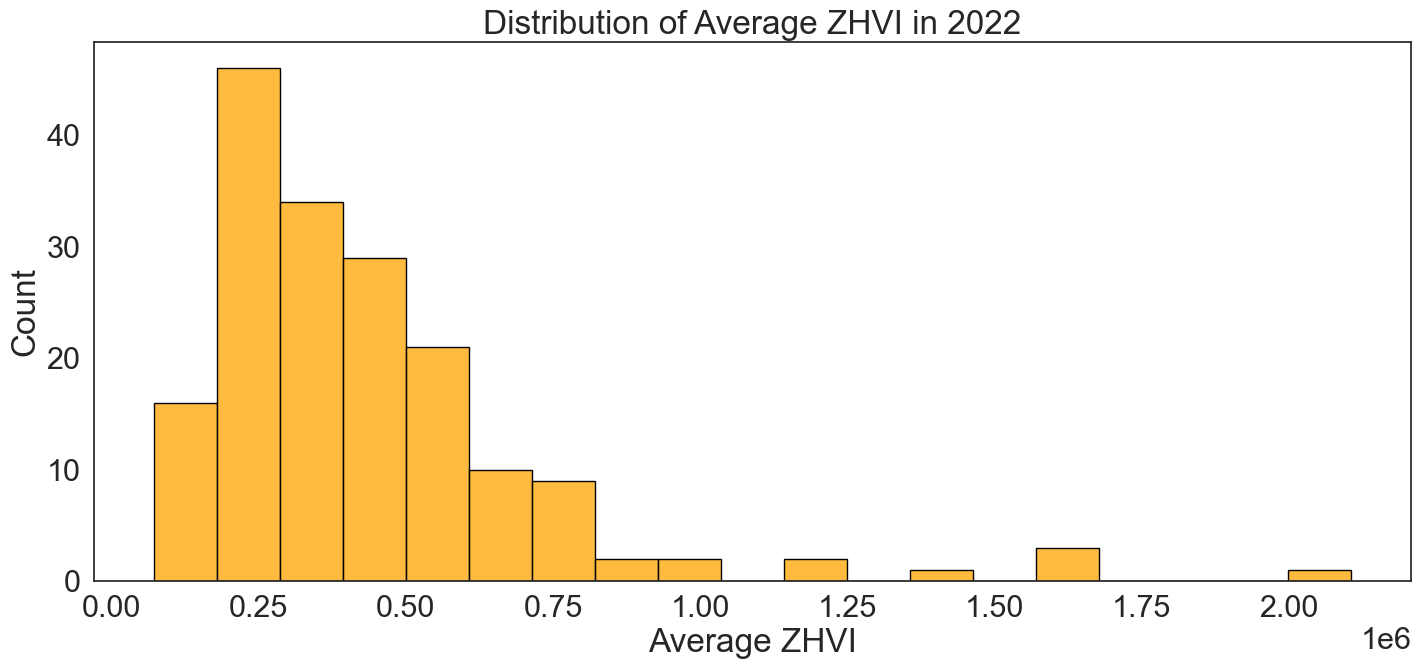

In [13]:
# histogram average ZHVI In 2022
sns.histplot(data=crime_and_housing_val, x='average_2022', edgecolor='black', color = 'orange')
plt.title("Distribution of Average ZHVI in 2022")
plt.xlabel('Average ZHVI')

Again, we can see a clear right-skew in the average ZHVI among the cities present. It looks like most of the cities we have have an average ZHVI of less than 1,000,000. There are a few cities outside of that range so let's see what they are. 

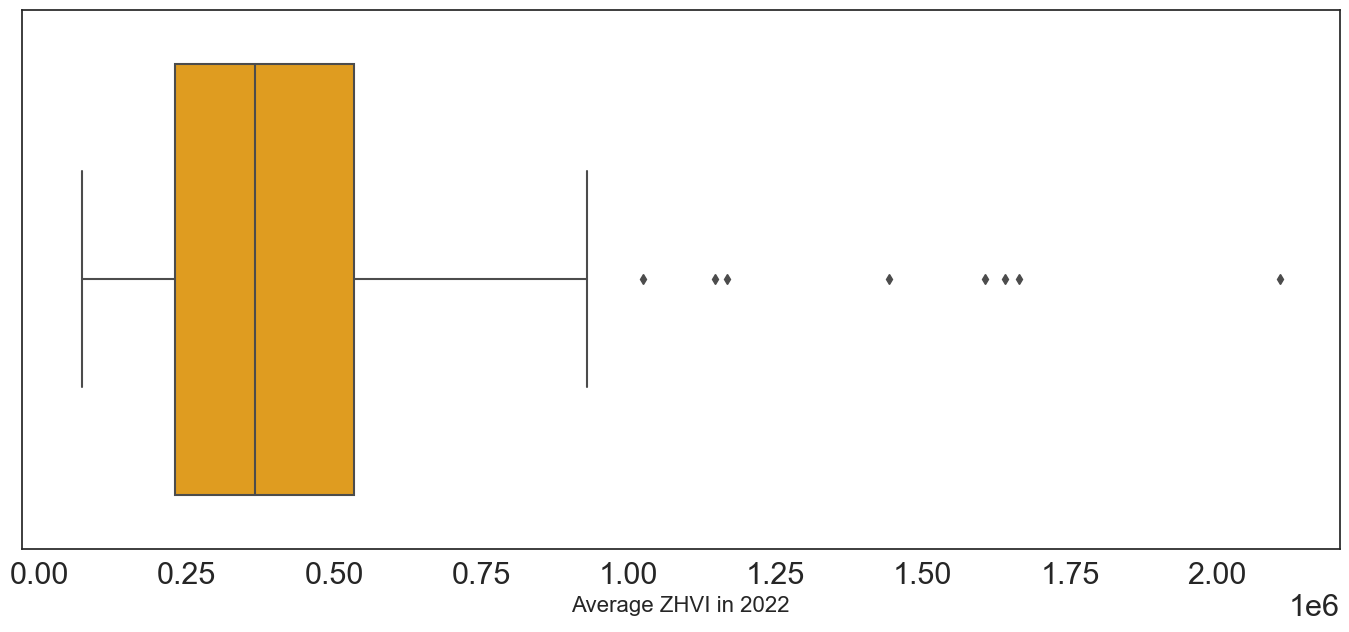

In [14]:
# box plot ZHVI in 2022 (to see outliers)
sns.boxplot(x='average_2022', data=crime_and_housing_val, color = 'orange')
plt.xlabel('Average ZHVI in 2022', fontsize=16);

In [15]:
# Calculate Q1, Q3, and IQR
Q1 = crime_and_housing_val['average_2022'].quantile(0.25)
Q3 = crime_and_housing_val['average_2022'].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper thresholds for outliers
lower_threshold = Q1 - 1.5 * IQR
upper_threshold = Q3 + 1.5 * IQR

# Get outlier observations
outliers = crime_and_housing_val[(crime_and_housing_val['average_2022'] < lower_threshold) | (crime_and_housing_val['average_2022'] > upper_threshold)]

print(outliers)

            City State  Violent Crime Rate  average_2022
92     San Diego    CA          314.566455  1.024841e+06
99     Cambridge    MA          295.811798  1.663848e+06
112  Santa Clara    CA          249.675648  1.639004e+06
113      Burbank    CA          248.775787  1.166892e+06
126     Torrance    CA          201.154514  1.147366e+06
140    Sunnyvale    CA          162.858993  2.106102e+06
143     Carlsbad    CA          151.758079  1.442630e+06
156     Bellevue    WA          119.833830  1.605321e+06


An interesting observation to note is that most of the outliers are from the West Coast (mainly California).



We can then plot these two variables together in a scatterplot in order to uncover any potential trends at a glance. 

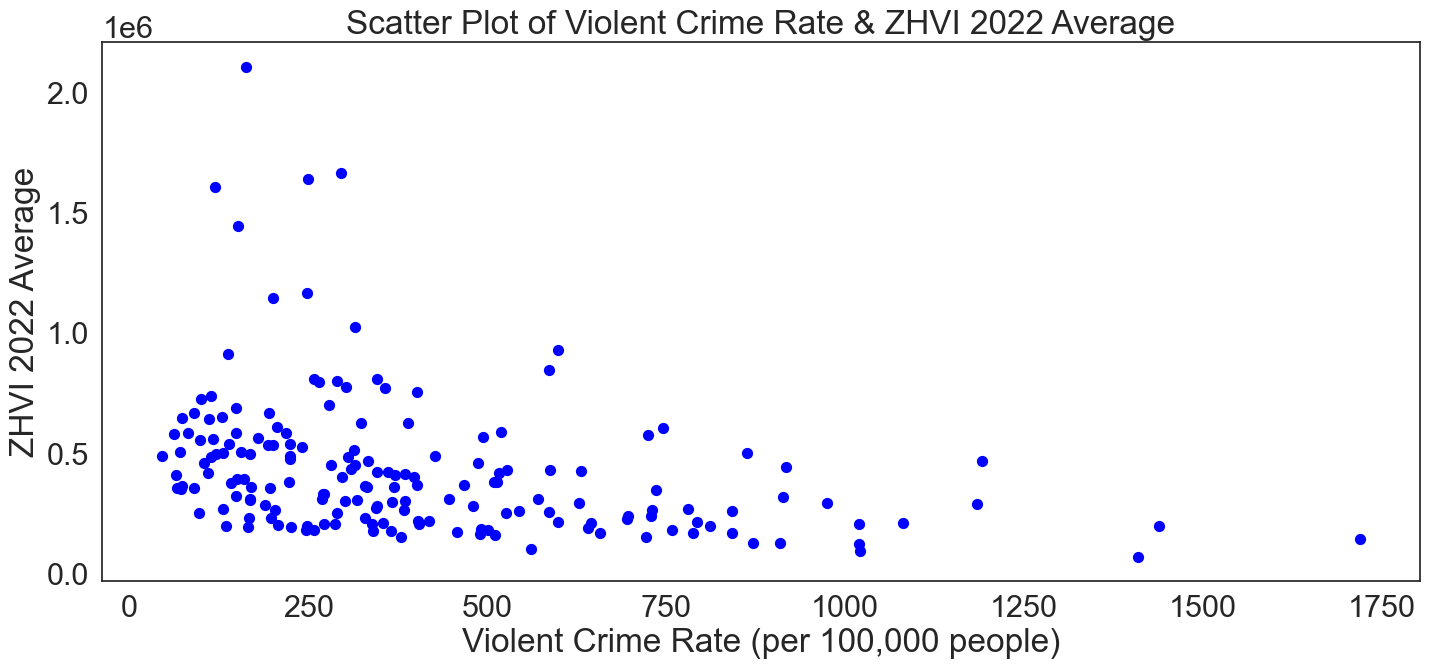

In [16]:
# Scatter plot
crime_and_housing_val.plot.scatter(x='Violent Crime Rate', y='average_2022', color='blue', marker='o', s=50)

# Set plot labels and title
plt.xlabel('Violent Crime Rate (per 100,000 people)')
plt.ylabel('ZHVI 2022 Average')
plt.title('Scatter Plot of Violent Crime Rate & ZHVI 2022 Average')

# Show the plot
plt.show()

We can see a non-linear, downward trend shown. Since the scatterplot fails to show a linear correlation between Violent Crime Rate and Home Value Indices, we will be conducting a Spearman Correlation test instead to analyze these variables. 

In [17]:
# spearman correlation test
crime_and_housing_val['Violent Crime Rate'].corr(crime_and_housing_val['average_2022'], method='spearman')

-0.45732115342284835

The spearman correlation for crime rates and housing values across the U.S. is about -0.45. This means that the ZHVI Average in 2022 tends to decrease when Violent Crime Rate increases and vice versa. While this indicates a moderately strong correlation between the two variables, we are interested in seeing how this correlation may differ based on which region of the U.S. a city is located in. 

### Section 2: Region Breakdown

Here, we will be focusing on states within the four regions of the United States as defined by the U.S. Census <a name="cite_ref-10"></a>[<sup>10</sup>](#cite_note-10) to see if there are trends within cities of these states which could potentially show a stronger correlation between crime rates and housing value indices on the individual region level.

In [18]:
# list of regions as defined by the U.S. Census
northeast = ['Connecticut', 'Maine', 'Massachusetts', 'New Hampshire', 'Rhode Island', 'Vermont', 'New Jersey', 'New York', 'Pennsylvania']
northeast = [us.states.lookup(state).abbr if us.states.lookup(state) else state for state in northeast]

midwest = ['Illinois', 'Indiana', 'Michigan', 'Ohio', 'Wisconsin', 'Iowa', 'Kansas', 'Minnesota', 'Missouri', 'Nebraska', 'North Dakota', 'South Dakota']
midwest = [us.states.lookup(state).abbr if us.states.lookup(state) else state for state in midwest]

south = ['Delaware', 'Florida', 'Georgia', 'Maryland', 'North Carolina', 'South Carolina', 'Virginia', 'West Virginia', 'Alabama', 'Kentucky', 'Mississippi', 'Tennessee', 'Arkansas', 'Louisiana', 'Oklahoma', 'Texas']
south = [us.states.lookup(state).abbr if us.states.lookup(state) else state for state in south]

west = ['Arizona', 'Colorado', 'Idaho', 'Montana', 'Nevada', 'New Mexico', 'Utah', 'Wyoming', 'Alaska', 'California', 'Hawaii', 'Oregon', 'Washington']
west = [us.states.lookup(state).abbr if us.states.lookup(state) else state for state in west]

#determine which states are excluded
all_states = northeast + midwest + south + west
crime_housing_states = list(crime_and_housing_val['State'].unique()) #all states included in crime_and_housing_val
excluded_states = list(set(all_states) ^ set(crime_housing_states))
print(excluded_states)

['MS', 'WV', 'ME', 'HI', 'AK', 'DE', 'WY', 'PA', 'NH', 'VT']


As indicated before, while our data covers the majority of the United States, the above ten states will be excluded as they were not reported in the crime dataset.

In [19]:
#add new Region Column and assign Region to every City, State

crime_and_housing_val['Region'] = ''

for i in range(len(crime_and_housing_val)): 
    
    state = crime_and_housing_val.loc[i, 'State']
    col = crime_and_housing_val.pop('Region')
    crime_and_housing_val.insert(2, col.name, col)
    
    if state in northeast:
        crime_and_housing_val.loc[i, 'Region'] = 'Northeast'
    
    elif state in midwest:
        crime_and_housing_val.loc[i, 'Region'] = 'Midwest'
    
    elif state in south:
        crime_and_housing_val.loc[i, 'Region'] = 'South'
    
    elif state in west:
        crime_and_housing_val.loc[i, 'Region'] = 'West'
    
    else:
        crime_and_housing_val.loc[i, 'Region'] = np.nan
        
crime_and_housing_val

,City,State,Region,Violent Crime Rate,average_2022
0,Memphis,TN,South,1720.086720,145509.404617
1,Little Rock,AR,South,1439.019469,198783.774528
2,Detroit,MI,Midwest,1410.700185,71702.600692
3,Tacoma,WA,West,1191.981461,466892.232451
4,Pueblo,CO,West,1184.606293,290099.792223
...,...,...,...,...,...
172,McKinney,TX,South,70.234712,505959.907519
173,Pearland,TX,South,66.150587,356452.762507
174,Sugar Land,TX,South,65.607967,409801.285454
175,Cary,NC,South,62.452528,580048.247448


From a quick glance, we can check if the cities with the highest crime rate also have the lowest home value index as hypothesized.

In [20]:
#check for city and region with the highest crime rate
highest_crime = crime_and_housing_val.nlargest(10, 'Violent Crime Rate')
highest_crime

,City,State,Region,Violent Crime Rate,average_2022
0,Memphis,TN,South,1720.086720,145509.404617
1,Little Rock,AR,South,1439.019469,198783.774528
2,Detroit,MI,Midwest,1410.700185,71702.600692
3,Tacoma,WA,West,1191.981461,466892.232451
4,Pueblo,CO,West,1184.606293,290099.792223
5,Kansas City,MO,Midwest,1081.911910,210740.968194
6,Cleveland,OH,Midwest,1020.792854,93961.144621
7,Rockford,IL,Midwest,1019.947649,122201.509627
8,Springfield,MO,Midwest,1019.599025,205276.798147
9,Albuquerque,NM,West,974.923203,295418.163826


In [21]:
#check for city and region with the lowest home value index
lowest_home = crime_and_housing_val.nsmallest(10, 'average_2022')
lowest_home

,City,State,Region,Violent Crime Rate,average_2022
2,Detroit,MI,Midwest,1410.700185,71702.600692
6,Cleveland,OH,Midwest,1020.792854,93961.144621
42,Toledo,OH,Midwest,561.233751,101776.843145
7,Rockford,IL,Midwest,1019.947649,122201.509627
13,Dayton,OH,Midwest,872.049316,126186.278726
12,Lansing,MI,Midwest,909.515123,127198.405260
0,Memphis,TN,South,1720.086720,145509.404617
71,Wichita Falls,TX,South,379.261956,152260.523466
27,Beaumont,TX,South,722.525805,153046.234882
49,Davenport,IA,Midwest,510.714216,161282.242731


Looking at the regions, the Midwest appears to be the region with the highest crime rate and lowest home value indices in both dataframes. There is no other outstanding repeats of cities or states in both dataframes.

In [22]:
#check for city and region with the lowest crime rate
lowest_crime = crime_and_housing_val.nsmallest(10, 'Violent Crime Rate')
lowest_crime

,City,State,Region,Violent Crime Rate,average_2022
176,Carmel,IN,Midwest,45.393085,490957.958493
175,Cary,NC,South,62.452528,580048.247448
174,Sugar Land,TX,South,65.607967,409801.285454
173,Pearland,TX,South,66.150587,356452.762507
172,McKinney,TX,South,70.234712,505959.907519
171,Concord,NC,South,72.542258,352441.402643
170,Frisco,TX,South,72.836487,647267.557873
169,Virginia Beach,VA,South,73.903943,366295.028435
168,Gilbert,AZ,West,82.069019,585639.959502
167,Alexandria,VA,South,90.366890,668649.069040


In [23]:
#check for city and region with the highest home value index
highest_home = crime_and_housing_val.nlargest(10, 'average_2022')
highest_home

,City,State,Region,Violent Crime Rate,average_2022
140,Sunnyvale,CA,West,162.858993,2.106102e+06
99,Cambridge,MA,Northeast,295.811798,1.663848e+06
112,Santa Clara,CA,West,249.675648,1.639004e+06
156,Bellevue,WA,West,119.833830,1.605321e+06
143,Carlsbad,CA,West,151.758079,1.442630e+06
113,Burbank,CA,West,248.775787,1.166892e+06
126,Torrance,CA,West,201.154514,1.147366e+06
92,San Diego,CA,West,314.566455,1.024841e+06
36,Seattle,WA,West,598.921738,9.299236e+05
150,Scottsdale,AZ,West,137.868768,9.125854e+05


While the South appears the most in the regions with the lowest crime rates, the West appears to be the Region with the highest home value index. 

From a quick glance, the city with the highest crime rate does not match the city with the lowest home value index. Similarly, the city with the lowest crime rate does not match the city the the highest home value index. However, the region with the highest crime rates do appear to match the region with the lowest home value indices. To better analyze these trends, we will be examining regions across the entire dataset to see if there are any interesting patterns overall among regions and their crime rates potentially correlating with their home value indices. First, we will need to see if the distribution of cities across regions are approximately the same.

In [24]:
#check to see how many cities are in each region
crime_and_housing_val['Region'].value_counts()

South        70
West         62
Midwest      32
Northeast    13
Name: Region, dtype: int64

To address the drastic differences in distribution of cities across regions, we will be analyzing plots based on proportions rather than counts.

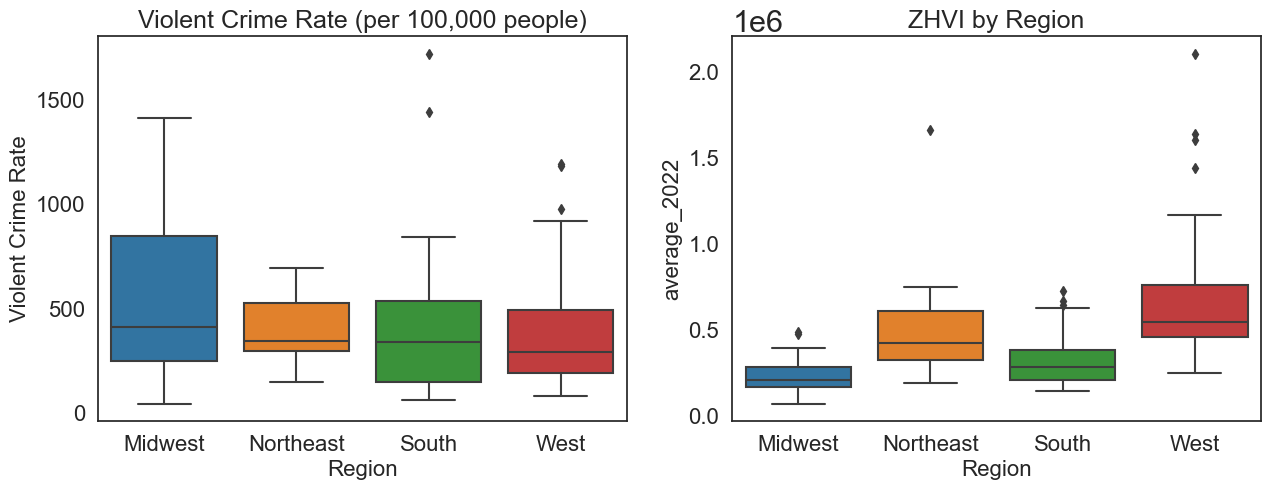

In [25]:
#create proportion df for crime rates by region

prop_crime = (crime_and_housing_val.groupby(['Region'])['Violent Crime Rate']
           .value_counts(normalize=True)
           .rename('proportion')
           .reset_index())

#create proportion df for housing values by region

prop_housing = (crime_and_housing_val.groupby(['Region'])['average_2022']
           .value_counts(normalize=True)
           .rename('proportion')
           .reset_index())


plt.figure(figsize=(15, 5))

#customize palette
color_palette = sns.color_palette("tab10", n_colors=10)

plt.subplot(1, 2, 1)
sns.boxplot(x='Region', y='Violent Crime Rate', data=prop_crime, palette = color_palette)
plt.xlabel('Region', fontsize=16)
plt.ylabel('Violent Crime Rate', fontsize=16)
plt.title('Violent Crime Rate (per 100,000 people)', fontsize = 18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)


plt.subplot(1, 2, 2)
sns.boxplot(x='Region', y='average_2022', data=prop_housing, palette = color_palette)
plt.xlabel('Region', fontsize=16)
plt.ylabel('average_2022', fontsize=16)
plt.title('ZHVI by Region', fontsize = 18)

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.show()

Comparing Violent Crime Rate proportions side by side with Home Value Indices (ZHVI), The Midwest is more skewed toward higher violent crime rates and has the lowest concentration of home value indices.

## Section 3: Averages and Spearmen Correlation between Crime Rate and Home Value Index (ZHVI) by Region

Now that we have region breakdowns for the crime and housing dataset, we are interested in computing 
descriptive statistics and Spearmen Correlations on each region to determine how the correlation differs based on region.

In [26]:
# filter/separate merged dataset by regions
northeast = crime_and_housing_val[crime_and_housing_val['State'].isin(northeast)]
midwest = crime_and_housing_val[crime_and_housing_val['State'].isin(midwest)]
south = crime_and_housing_val[crime_and_housing_val['State'].isin(south)]
west = crime_and_housing_val[crime_and_housing_val['State'].isin(west)]

In [27]:
# northeast descriptive statistics
northeast.describe()

,Violent Crime Rate,average_2022
count,13.000000,1.200000e+01
mean,388.811669,5.380875e+05
std,176.663847,3.926070e+05
min,148.913011,1.914114e+05
25%,295.811798,3.253895e+05
50%,345.930471,4.272104e+05
75%,527.279239,6.096336e+05
max,696.959078,1.663848e+06


In [28]:
#midwest descriptive statistics
midwest.describe()

,Violent Crime Rate,average_2022
count,32.000000,32.000000
mean,523.183258,233259.354064
std,353.851104,103409.122198
min,45.393085,71702.600692
25%,249.806220,168901.001485
50%,412.215491,208986.562267
75%,849.651684,287408.543385
max,1410.700185,490957.958493


In [29]:
# south descriptive statistics
south.describe()

,Violent Crime Rate,average_2022
count,70.000000,70.000000
mean,385.838530,316623.388311
std,308.247984,134843.216257
min,62.452528,145509.404617
25%,149.243042,209671.393363
50%,339.649901,285018.440589
75%,536.570960,381260.191029
max,1720.086720,728057.893409


In [30]:
# west descriptive statistics
west.describe()

,Violent Crime Rate,average_2022
count,62.000000,6.200000e+01
mean,368.179761,6.532530e+05
std,259.752009,3.438669e+05
min,82.069019,2.533150e+05
25%,194.298718,4.596614e+05
50%,293.156690,5.475688e+05
75%,492.230956,7.625480e+05
max,1191.981461,2.106102e+06


In [31]:
#create dataframe showing descending avg Violent Crime Rates and Corresponding Home Value Indices

avg_region = {
    'northeast': northeast.mean(),
    'midwest': midwest.mean(),
    'south': south.mean(),
    'west': west.mean()
}

avg_region_df = pd.DataFrame(avg_region)
avg_region_df = avg_region_df.transpose()
avg_region_df.sort_values(by = 'Violent Crime Rate', ascending = False)

/var/folders/c_/kyzb5x6n5w92bd7g2zz722zh0000gn/T/ipykernel_13293/3329642222.py:4: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  'northeast': northeast.mean(),
/var/folders/c_/kyzb5x6n5w92bd7g2zz722zh0000gn/T/ipykernel_13293/3329642222.py:5: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  'midwest': midwest.mean(),
/var/folders/c_/kyzb5x6n5w92bd7g2zz722zh0000gn/T/ipykernel_13293/3329642222.py:6: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition

,Violent Crime Rate,average_2022
midwest,523.183258,233259.354064
northeast,388.811669,538087.532439
south,385.838530,316623.388311
west,368.179761,653252.965102


With these descriptive statistics, we can compare the characteristics of each region. Again, we can see that the Midwest has the highest mean violent crime rate at about 523.18, but the lowest average home value index at about 233259.35. Conversely, we can also see that the West has the lowest mean violent crime rate at about 368.18 and the highest average home value index at about 6.53e+05. The northeast does not follow the predicted trend; despite being ranked as the second highest crime rate region, it still has a relatively high average home value index and is ranked as the second most expensive.

Beyond these averages, we will conduct Spearmen correlations to seeing whether or not there is a connection between home value index and crime rate which might provide any corroborating statistics by region.

In [33]:
#spearmen correlations by region
northeast_spearman = northeast['Violent Crime Rate'].corr(northeast['average_2022'], method='spearman')
midwest_spearman = midwest['Violent Crime Rate'].corr(midwest['average_2022'], method='spearman')
south_spearman = south['Violent Crime Rate'].corr(south['average_2022'], method='spearman')
west_spearman = west['Violent Crime Rate'].corr(west['average_2022'], method='spearman')

print("northeast:", northeast_spearman, "\nmidwest:", midwest_spearman, "\nsouth:", south_spearman, "\nwest:", west_spearman)

northeast: -0.4895104895104896 
midwest: -0.6451612903225806 
south: -0.5566792056687954 
west: -0.4245423182493516


Upon conducting a Spearman correlation analysis between violent crime rates and average home values across all regions, we observed a consistent negative correlation. This suggests that areas with lower violent crime rates tend to exhibit higher average home values, while regions with higher crime rates tend to have lower average home values. The strongest negative correlation was observed in the Midwest, followed by the South, Northeast, and West.

In the **Midwest** region, we found the strongest negative correlation, with a Spearman correlation coefficient of about **-0.65**. This information is consistent with our boxplots above, as we saw the Midwest had higher crime rates and a low concentration of home value indices than the other regions. 

Following the Midwest, the **South** region exhibited the next strongest negative correlation, with a coefficient of **-0.56**. In the **Northeast** region, we observed a moderate negative correlation, with a coefficient of **-0.49**. Lastly, the **West** region displayed the weakest negative correlation, with a coefficient of **-0.42**. Overall, these Spearman correlation coefficients are not strong enough to be considered causational, but they do provide valuable insights into the relationship between violent crime rates and average home values for these regions. 

# Ethics & Privacy

One potential bias comes from data collection from the Crime dataset which only collects crime rate from cities which are reported to the FBI. This may pose issues in the accuracy of our findings regarding the connection between housing values and safety. In 2021, the FBI began to require police departments to send their information through a new National Incident-Based Reporting System (NIBRS)<a name="cite_ref-8"></a>[<sup>8</sup>](#cite_note-8). Many departments were unable to format their data to be NIBRS compliant and this led to the FBI only being able to account for 76.9% of the US population by the end of 2022<a name="cite_ref-8"></a>[<sup>8</sup>](#cite_note-8),<a name="cite_ref-9"></a>[<sup>9</sup>](#cite_note-9). To give a few examples, the 2022 data did not include prominent cities such as New York City, Los Angeles, and San Francisco. Low participation makes it harder for our group to understand crime trends accross the US, and particularly in the areas in which the police department did not report their crime data. Furthermore, when this data is mapped out, there are noticeably more crime rate reports from cities in southern parts of the United States and on the East Coast while there are fewer from the western side of the United States. To address this, we would also need to communicate confounding variables which may explain why more cities in the South would be reported; reasons may include gentrification, poverty rates, and affluence in those areas. 

An ethical concern may be what equitable impacts that may result from this research. For example, if the cities we are extracting data from are high crime/low safety rating cities, that may, in turn, depreciate or impact home value. Similar to crime mapping where one is able to visualize patterns where crime is happening, there may be adverse effects on populations and communities in areas where high crime is identified. Understanding that our project is adjacent to crime mapping, we acknowledge that crime mapping can be used to prepetuate narratives against under-represented groups. Our project looks to avoid this by not including any demographic data in our analysis. 

# Discussion and Conclusion

After exploring and analyzing our data on differing home values in accordance with crime rates, we reject our hypothesis that cities with higher housing values are associated with lower crime rates, while cities with lower housing values are associated with higher crime rates. Each region possesses a negative correlation in the spearman correlation tests we ran, with the Midwest showing the strongest negative correlation, indicating low housing values and high crime rates, which is consistent with our hypothesis. While the Northeast, South, and North regions also show a negative correlation, they are not strong enough to make a statement on whether our data and analysis supports our hypothesis, hence why we reject it. Ultimately, there are no profound findings that would lead us to firmly conclude whether or not home values are correlated with certain crime rates. 

Our team tackled the problem from the point of view of a prospective home buyer who cares about violent crime and is looking for a single family home. While we found that the connection between violent crime and home values is weak, our project does not extrapolate this trend to include nonviolent crimes (e.g. theft) or other types of living situations. However, as our data found a weak correlation between violent crime and single family housing value, we might expect nonviolent crimes and the value of other types of living situations to follow a similar weak negative correlation. In which, low housing values weakly correspond to high crime rates, and vice versa.     

We started off our exploratory data analysis with plotting each dataset in a histogram in order to get a better understanding of our data. The analysis of these plots provided valuable initial insight into the distribution of single-family home indices and violent crime rate and sheds light on the validity of our initial assumptions. The distribution of violent crime rate was skewed to the right, with most cities having a violent crime rate of less than 1000. Similarly, the distribution of the average ZHVI in 2022 was right-skewed, with most cities having an average ZHVI of less than 1,000,000. These histograms showed some discrepancies between the observed data and our hypothesis, as we initially expected a linear relationship. However, as both datasets are right-skewed, we expected a scatterplot to exhibit this as well. This was confirmed when we plotted the two variables in a scatter plot with violent crime rate along the x-axis and the ZHVI average along the y-axis. We saw a non-linear trend, so we were unable to conduct linear regression as we were planning on doing. While these deviations may initially appear to contradict our hypothesis, we noticed that the scatter plot had a slight downward, negative trend, so we moved forward with conducting a Spearman Correlation test as we could instead analyze these variables as a monotonic relationship. We calculated the Spearman Correlation coefficient to be -0.45, indicating a moderate negative correlation between our two variables whereas the ZHVI average decreases, the violent crime rate increases and vice versa. This contradicts our hypothesis as this is not as strong of a correlation as we intended, but we examined this further in our region breakdown. 

To further examine our data on a regional scale, we analyzed the U.S. based on four regions: the Northeast, Midwest, South, and West. Each observation from the crime_and_housing_val dataset including 40 states are assigned to a region (10 states are excluded as their crime rates were not reported to the FBI). From sampling the observations with the top ten and bottom ten crime rates and home value indices, we notice that there is no outstanding trend in cities which follow our hypothesis. However, there is a pattern in one region which corresponds with our hypothesis: The Midwest appears the most in the top ten highest crime rate observations and in the lowest home value indices. Using boxplots to interpret the entire dataset, we notice that this pattern is true across the entire dataset for the Midwest where the majority of reported cities in the Midwest have higher violent crime rates and home value indices below $500,000, averaging below all other regions. Running descriptive statistics on each region, we notice that the only region that doesn’t follow our predicted trend is the northeast, which has the second highest crime rate average, but also the second highest home value index. To test whether or not there is a strong relationship between the two variables, we used Spearman correlations to further understand our data. Spearman correlations by region all indicate negative relationships with the Midwest having the strongest correlation of approximately -0.65 while the correlations for the Northeast, South, and West are more moderate. 

In terms of future work, our methodology can be applied to 2023’s and future datasets to ascertain whether the weak correlation and trends we discovered persist between different years. Unlike the 2022 datasets we used, datasets from future years will likely include statistics on a larger number of U.S. cities. While our 2022 datasets only accounted for 76.9% of the U.S. city population, future projects should more accurately reveal trends between violent crime and housing value. 

# Team Contributions

- Natalie: Found Zillow source for dataset and created merged dataset. Wrote code for data cleaning/wrangling/style for ZHVI and Section 2 of EDA to analyze patterns by region/create region boxplots. Explained visualizations in part of the conclusion. Helped determine which correlation tests should be run.
- Edward: Wrote abstract and part of conclusion explaining what patterns arose and if we expected it. Helped expand on Background & Prior Works by finding related works and explaining their importance. Also helped find & clean FBI Crime Rate data as well as generate multiple EDA plots (histogram and scatterplot). 
- Jasmine: Helped clean ZHVI dataset. Helped with histogram plots in EDA. Helped with Section 3 of EDA. Wrote part of conclusion explaining plots in Section 1 of EDA.
- James: Helped find Crime Rate Dataset. Wrote Ethics and part of Background. Helped with histogram plots in EDA. Wrote part of conclusion pertaining to background, confounds, and ethics. 
- Jan: Brainstormed topics. Helped write part of the conclusion explaining why we reject our hypothesis. Contributed to ethics and privacy. Helped with boxplots and Section 3 of EDA.

# Works Cited

1. <a name="cite_note-1"></a> [^](#cite_ref-1) Florida, R. (28 May 2019) Young People’s Love of Cities Isn’t a Passing Fad. *Bloomberg*. https://www.bloomberg.com/news/articles/2019-05-28/u-s-millennials-really-do-prefer-cities 
2. <a name="cite_note-2"></a> [^](#cite_ref-2) Melanie Davern et al. (16 September 2019) We must address these 3 factors, to make our cities more vibrant and ‘liveable’. *World Economic Forum* https://www.weforum.org/agenda/2019/09/this-is-what-makes-a-city-liveable/
3. <a name="cite_note-3"></a> [^](#cite_ref-3) (21 December 2022) Which cities have the highest or lowest crime rates?. *USAFacts* https://usafacts.org/articles/how-does-crime-compare-by-city-in-2021/
4. <a name="cite_note-4"></a> [^](#cite_ref-4) Olya, G. (24 April 2019) America’s Safest (and Most Affordable) Places to Live. *Yahoo Finance* https://finance.yahoo.com/news/america-safest-most-affordable-places-090000118.html
5. <a name="cite_note-5"></a> [^](#cite_ref-5) Nuñez, C. (27 May 2015) Is your city safe? Here are some things worth considering. *Global Citizen* https://www.globalcitizen.org/en/content/is-your-city-safe-here-are-some-things-worth-consi/
6. <a name="cite_note-6"></a> [^](#cite_ref-6) Department of Justice Violent Crime. *Department of Justice* https://nij.ojp.gov/topics/crimes/violent-crime
7. <a name="cite_note-7"></a> [^](#cite_ref-7) Wikipedia. List of US Cities by population. *Wikipedia* https://en.wikipedia.org/wiki/List_of_United_States_cities_by_population
8. <a name="cite_note-8"></a> [^](#cite_ref-8) The Marshall Project. (8 October 2022) The Problem with the FBI's Missing Crime Data. *The Marshall Project* https://www.themarshallproject.org/2022/10/08/the-problem-with-the-fbi-s-missing-crime-data
9. <a name="cite_note-9"></a> [^](#cite_ref-9) Federal Bureau of Investigation. (16 October 2023) FBI Releases 2022 Crime in the Nation Statistics. *Federal Bureau of Investigation* https://www.fbi.gov/news/press-releases/fbi-releases-2022-crime-in-the-nation-statistics
10. <a name="cite_note-10"></a> [^](#cite_ref-10) Wikipedia Contributors. (15 Oct. 2019) “List of Regions of the United States.” *Wikipedia, Wikimedia Foundation*
https://en.wikipedia.org/wiki/List_of_regions_of_the_United_States